# Stellar Object Classification
### An Analysis of Common Classification Methods
![title](stars.jpg)

Because stellar objects are at unfathomable distances, gaining visual data can be exceedingly difficult.  However, using other measurements, stellar objects can be grouped into three main classes: star, galaxy, or quasar.

When approaching a machine learning problem that involves fitting values into discrete classifications, there are always questions about the validity of the classifier.  In this project, analysis of the most common machine learning classification methods will be done.  

Below are the classifiers we will be using:

In [2]:
 clfs=[
   'KNeighborsClassifier'
 , 'SVM'
 , 'DecisionTreeClassifier'
 , 'RandomForestClassifier'
 , 'GaussianNB'
 , 'LinearDiscriminantAnalysis'
 , 'QuadraticDiscriminantAnalysis'
 , 'RBM'
 , 'Logistic Regression']

In [13]:
#Classifiers Packages:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression

#Sklearn Processing Packages:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score, accuracy_score, log_loss
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

#Data Loading and Processing Packages:
import pandas as pd
import numpy as np

#Data Visualization Packages:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm as cm

## Importing and Preparing Data

In [4]:
INIT=pd.read_csv("skyserver.csv")

#Removing Columns that have no statistical attributes
INIT=INIT.drop(['objid','ra','dec','fiberid','specobjid','run','rerun','camcol','field'], axis=1)
(INIT.corr())

,u,g,r,i,z,redshift,plate,mjd
u,1.000000,0.849232,0.692379,0.602630,0.551483,0.163741,-0.129430,-0.168793
g,0.849232,1.000000,0.958106,0.907419,0.879622,0.407576,-0.054981,-0.092772
r,0.692379,0.958106,1.000000,0.977672,0.969197,0.441080,0.019787,-0.009345
i,0.602630,0.907419,0.977672,1.000000,0.981507,0.431450,0.072958,0.050896
z,0.551483,0.879622,0.969197,0.981507,1.000000,0.424034,0.112397,0.095658
redshift,0.163741,0.407576,0.441080,0.431450,0.424034,1.000000,-0.038091,-0.057957
plate,-0.129430,-0.054981,0.019787,0.072958,0.112397,-0.038091,1.000000,0.966881
mjd,-0.168793,-0.092772,-0.009345,0.050896,0.095658,-0.057957,0.966881,1.000000


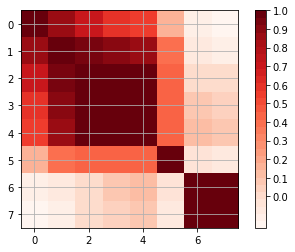

In [12]:
def correlation_matrix(df):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('Reds',30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)

    #ColorBar and Tick Marks
    fig.colorbar(cax, ticks=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
    plt.show()

correlation_matrix(INIT)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

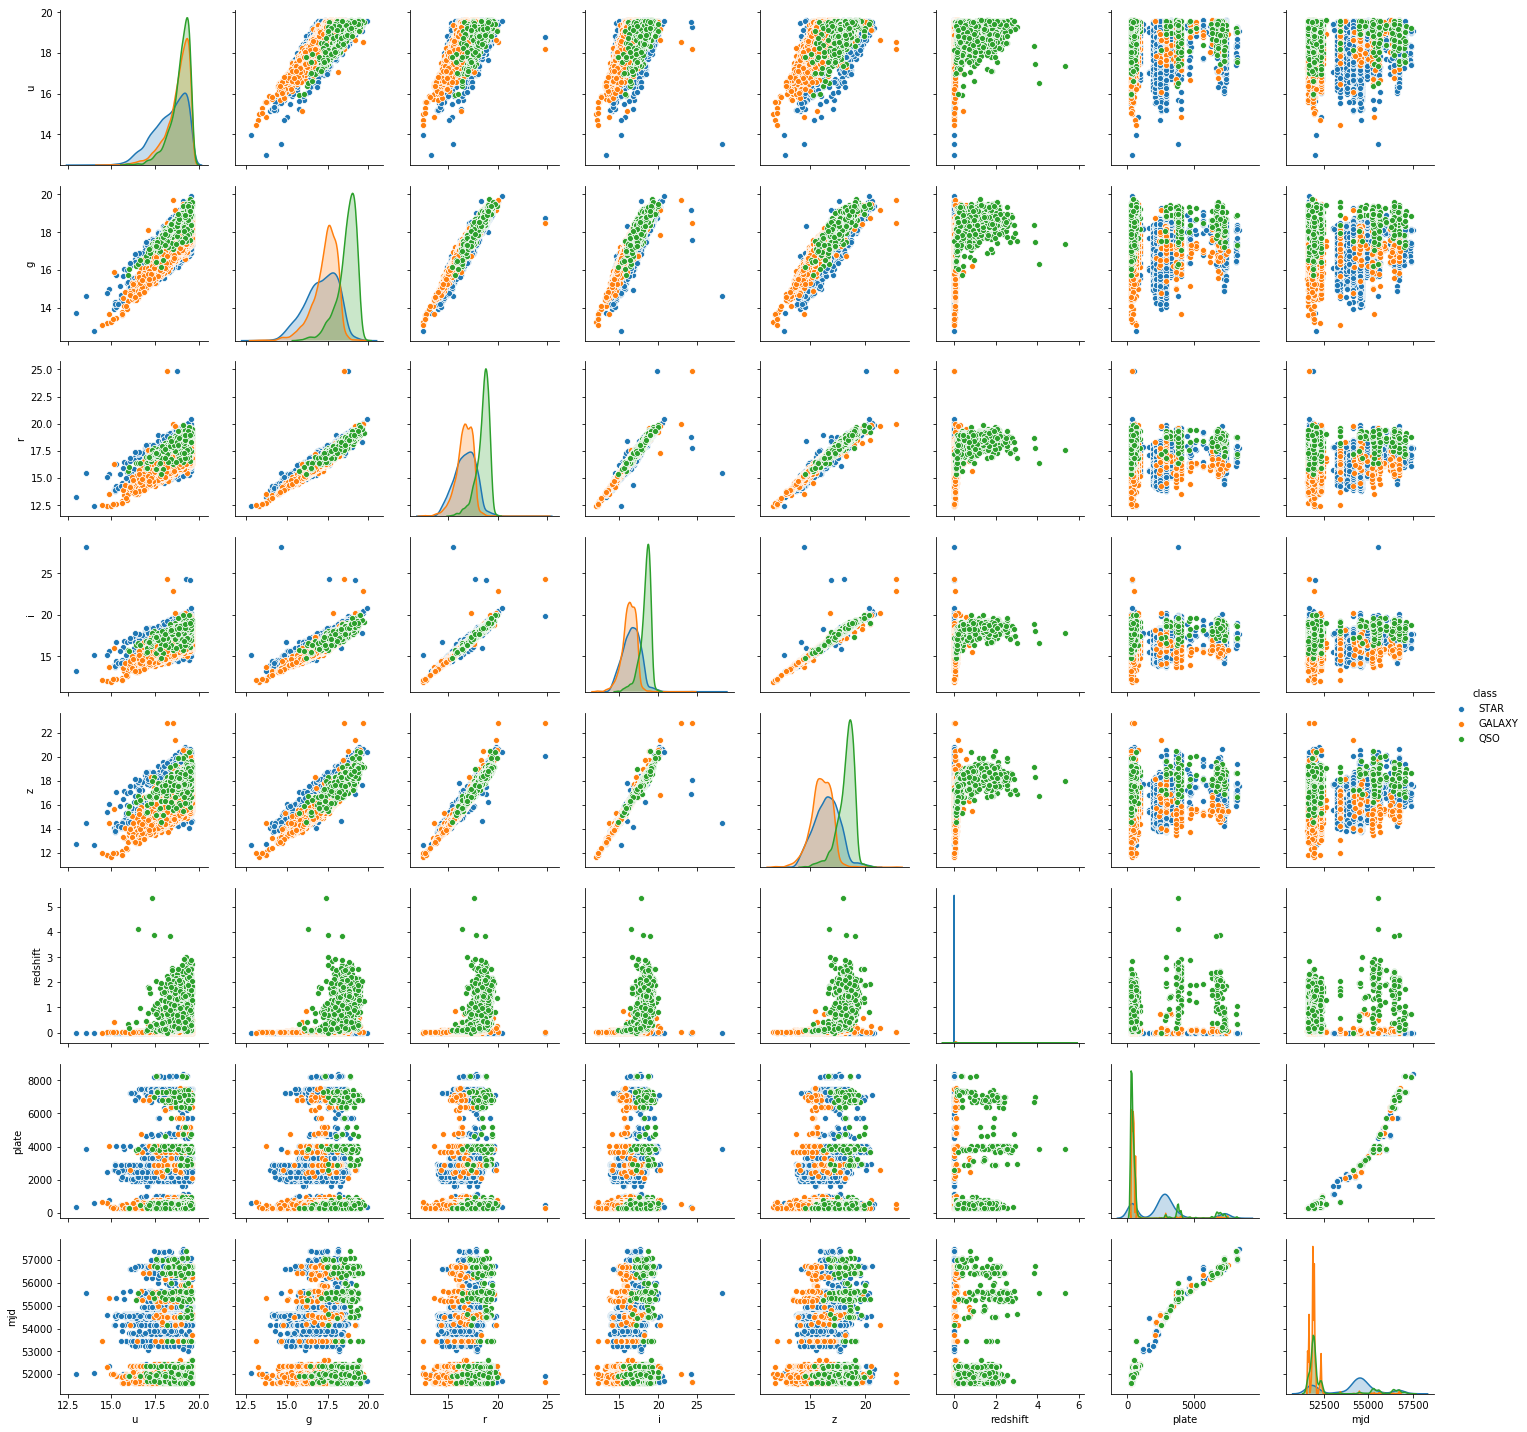

In [6]:
%matplotlib inline
plt.figure()
sns.pairplot(INIT, hue = "class")
plt.show()

## Test and Train Data

In [16]:
# STEP 1: Normilization
X=INIT.drop(['class'],axis=1)
X=preprocessing.scale(X)
# STEP 2: Split X and y into training and testing sets
X=INIT.drop(['class'],axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.2, random_state=4)
# STEP 3: Change y to Discrete Numberical Values
y=INIT['class']
le = LabelEncoder()
y = le.fit_transform(y)

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((8000, 8), (8000,), (2000, 8), (2000,))

***
***
# Classifiers

## K-Nearest Neighbor Classifier
![title](knn.png)
### Introduction:  
K Nearest Neihbors is a basic classification process for data analytics.  Essentially, classification is done by finding the most similar, usually be a distance metric, data points and then making a guess based on the classifications.

### Mathematics: 
The math is quite simple.  Using a euclidean distance:

\begin{equation*}
d(x, x') = \sqrt{\left(x_1 - x'_1 \right)^2 + \left(x_2 - x'_2 \right)^2 + \dotsc + \left(x_n - x'_n \right)^2}
\end{equation*}

The sum of the distance to each class is calculated.  Whichever summed distance is the smallest, the classifier chooses that classification to belong to.  


### Hyper-parameters (in focus):
 - n_neighbors:  This is the number of neighbors you would like to use in your calculations. 
 - algorithm: There are different types of algorithmms.
 - weights: When summing the distance, you may want different weights for how close or far a distant neighbor may be. In some situations, uniform is not the best.
 - p:  This is a numeric representation of different distance metrics.  Usually, euclidean would suffice.


### Hyper-parameter optimizer:

In the following section, we will identify what hyper-parmeters yield the highest accuracy.  Also, since this is a classification, we will also use f1 score as a metric.

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
clf = KNeighborsClassifier()

param_grid = {'n_neighbors': range(1,10), 'algorithm': ['auto','ball_tree','kd_tree', 'brute'], 'weights': ['uniform', 'distance'],'p': range(1,5)}

custom_knn = GridSearchCV(clf, param_grid)

custom_knn.fit(X_train, y_train)
y_pred = custom_knn.predict(X_test)
print(custom_knn.best_params_)
knn_score=[accuracy_score(y_pred, y_test), f1_score(y_pred, y_test, average='macro')]
print(knn_score)

{'algorithm': 'auto', 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
[0.79, 0.6440994612955444]


___________________________

## Standard Vector Classifier
![title](svc.png)
### Introduction:  
This classifier attempts to form a division between two groups, or classifications.  That division can be in the form of a line or other functions.  Compared to knn, the division is based on a global understanding instead of each individual point and the areas around it.

### Hyper-parameters (in focus):
 - C:  Penalty parameter C of the error term.
 - kernel: Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. 
 - degree: Degree of the polynomial function



### Hyper-parameter optimizer:

In the following section, we will identify what hyper-parmeters yield the highest accuracy.  Also, since this is a classification, we will also use f1 score as a metric.

In [ ]:
clf = SVC()

param_grid = {'C': range(1,10), 'kernel': ['linear','poly','rbf', 'sigmoid'],'degree': range(1,5)}

custom_svc = GridSearchCV(clf, param_grid)

custom_svc.fit(X_train, y_train)
y_pred = custom_svc.predict(X_test)
print(custom_svc.best_params_)
svc_score=[accuracy_score(y_pred, y_test), f1_score(y_pred, y_test, average='macro')]
print(svc_score)

___________________________

## Decision Tree Classifier
![title](iris.png)
### Introduction:  
This classifier determines paths using the feature sets.  The paths represent each possible instance of a linear combination of the independent and dependent variables.  It attempts to form a linear combination that limits the amount of enthropy.

### Hyper-parameters (in focus):
 - criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

 - splitter : The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

 - min_samples_split The minimum number of samples required to split an internal node:

### Hyper-parameter optimizer:

In the following section, we will identify what hyper-parmeters yield the highest accuracy.  Also, since this is a classification, we will also use f1 score as a metric.

In [52]:
clf = DecisionTreeClassifier()

param_grid = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'],'min_samples_split': range(2,15)}

custom_dtc = GridSearchCV(clf, param_grid)

custom_dtc.fit(X_train, y_train)
y_pred = custom_dtc.predict(X_test)
print(custom_dtc.best_params_)
dtc_score=[accuracy_score(y_pred, y_test), f1_score(y_pred, y_test, average='macro')]
print(dtc_score)

{'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'best'}
[0.98, 0.9747545582047685]


___________________________

## Random Forest Classifier
![title](rfc.png)
### Introduction:  

This classifier uses an ensemble of decision trees.   This classifier corrects for decision trees' habit of overfitting to their training set.

### Hyper-parameters (in focus):
 - n_estimators The number of trees in the forest.

 - criterion The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

 - min_samples_split : int, float, optional (default=2)
The minimum number of samples required to split an internal node:

### Hyper-parameter optimizer:

In the following section, we will identify what hyper-parmeters yield the highest accuracy.  Also, since this is a classification, we will also use f1 score as a metric.

In [61]:
clf = RandomForestClassifier()

param_grid = {'criterion': ['gini', 'entropy'], 'n_estimators': [2,3,4,5,7,10,50,100], 'min_samples_split': range(2,15)}

custom_rfc = GridSearchCV(clf, param_grid)

custom_rfc.fit(X_train, y_train)
y_pred = custom_rfc.predict(X_test)
print(custom_rfc.best_params_)
rfc_score=[accuracy_score(y_pred, y_test), f1_score(y_pred, y_test, average='macro')]
print(rfc_score)

{'criterion': 'gini', 'min_samples_split': 2, 'n_estimators': 3}
[0.98, 0.9747545582047685]


## Naive Bayes
![title](gnb.png)
### Introduction:  

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that this fruit is an apple and that is why it is known as ‘Naive’.

### Hyper-parameters (in focus):

No hyper-parameters will be optimized
### Accuracy:

In [61]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
gnb_score=[accuracy_score(y_pred, y_test), f1_score(y_pred, y_test, average='macro')]
print(gnb_score)

{'criterion': 'gini', 'min_samples_split': 2, 'n_estimators': 3}
[0.98, 0.9747545582047685]


## Linear Discriminant Analysis and Quadratic Discriminant Analysis
![title](lda.png)
### Introduction:  

LDA and QDA are supervised algorithms that computes the directions (“linear discriminants”/"quadratic discriminants) that will represent the axes that maximize the separation between multiple classes.

### Hyper-parameters (in focus):

These classifiers are attractive because they have closed-form solutions that can be easily computed, are inherently multiclass, have proven to work well in practice, and have no hyperparameters to tune.

### Accuracy:

In [61]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
lda_score=[accuracy_score(y_pred, y_test), f1_score(y_pred, y_test, average='macro')]
print(lda_score)

clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
qda_score=[accuracy_score(y_pred, y_test), f1_score(y_pred, y_test, average='macro')]
print(qda_score)

{'criterion': 'gini', 'min_samples_split': 2, 'n_estimators': 3}
[0.98, 0.9747545582047685]


##  - Bernoulli Restricted Boltzmann Machine (RBM)
![title](RBM.png)
### Introduction:  

RBMs are shallow, two-layer neural nets that constitute the building blocks of deep-belief networks. The first layer of the RBM is called the visible, or input, layer, and the second is the hidden layer.

### Hyper-parameters (in focus):

No hyperparameters to tune.

### Accuracy:

In [61]:
clf = BernoulliRBM()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rbm_score=[accuracy_score(y_pred, y_test), f1_score(y_pred, y_test, average='macro')]
print(rbm_score)

{'criterion': 'gini', 'min_samples_split': 2, 'n_estimators': 3}
[0.98, 0.9747545582047685]


##  Logistic Regression'
![title](lr.jpg)
### Introduction:  

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

### Hyper-parameters (in focus):

These classifiers are attractive because they have closed-form solutions that can be easily computed, are inherently multiclass, have proven to work well in practice, and have no hyperparameters to tune.

### Accuracy:

In [61]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
lr_score=[accuracy_score(y_pred, y_test), f1_score(y_pred, y_test, average='macro')]
print(lr_score)

{'criterion': 'gini', 'min_samples_split': 2, 'n_estimators': 3}
[0.98, 0.9747545582047685]


### Final Dataframe:
Below, we will create a  accuracy dataframe that will include the accuracy and f1 scores.

In [45]:
clfs_df=pd.DataFrame
clfs_df.columns=clfs
clfs_df.index=['Accuracy','F1 Score']
clfs_df['KNeighborsClassifier']=knn_score
clfs_df['SVM']=svm_score
clfs_df['DecisionTreeClassifier']=dtc_score
clfs_df['RandomForestClassifier']=rfc_score
clfs_df['GaussianNB']=gnb_score
clfs_df['LinearDiscriminantAnalysis']=lda_score
clfs_df['QuadraticDiscriminantAnalysis']=qda_score
clfs_df['RBM']=rbm_score
clfs_df['Logistic Regression']=lr_score

clfs_df